# Ideal equations of state

In [1]:
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot

PyPlot

In this notebook, we'll be giving examples of how one can use ideal equations of state within `Clapeyron.jl`, whether it be supplementing a residual equation of state or independently.

## Heat capacity of pentane

At minimum, ideal models are meant to account for the translational motions of a particle. However, these are not the only modes of motion that a particle can have; in multi-atomic particles, they can have vibrational and rotational modes which aren't accounted for by the simple ideal model. As such, one needs to include these modes within the ideal model. This is typically done through correlations such as the Joback method or Walker model. Below we show how the ideal model can be modified using the optional argument `idealmodel`:

In [2]:
model1 = SRK(["pentane"])
model2 = SRK(["pentane"];idealmodel=JobackIdeal)
model3 = JobackIdeal(["pentane"])
model4 = GERG2008(["pentane"])
model5 = CKSAFT(["pentane"];idealmodel=WalkerIdeal)
model6 = SAFTgammaMie(["pentane"];idealmodel=ReidIdeal)
models = [model1,model2,model3,model4,model5,model6];

Note that in the above, we can call ideal models one their own, where we only account for the translation, rotational and vibrational modes, and no other residual effects. We also point out that one can specify a group contribution ideal model and pair it up with a non group contribution residual model (and vice versa). 

Obtaining the heat capacity:

In [3]:
p = 5e6
T = range(450,580,length=200)
Cp = []

for i=1:6
    append!(Cp,[isobaric_heat_capacity.(models[i],p,T)])
end

Collecting some data from the NIST Chemistry Webbook:

In [4]:
T_exp = [450,455,460,465,470,475,480,485,490,495,500,505,510,515,520,525,530,535,540,545,550,555,560,565,570]

Cp_exp = [241.68,247.53,254.38,262.63,272.97,286.52,305.32,332.89,373.34,418.96,429.35,391.95,348.08,315.69,293.51,278.11,267.07,258.94,252.82,248.12,244.46,241.6,239.36,237.59,236.21];

Plotting:

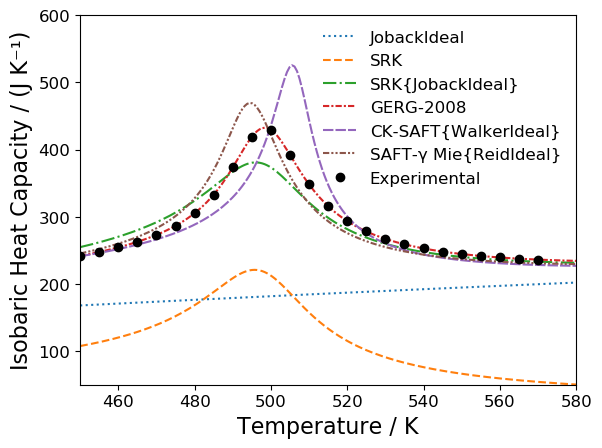

In [48]:
plt.plot(T,Cp[3],label="JobackIdeal",linestyle=":")
plt.plot(T,Cp[1],label="SRK",linestyle="--")
plt.plot(T,Cp[2],label="SRK{JobackIdeal}",linestyle="-.")
plt.plot(T,Cp[4],label="GERG-2008",linestyle=(0, (3, 1, 1, 1)))
plt.plot(T,Cp[5],label="CK-SAFT{WalkerIdeal}",linestyle=(0, (5, 1)))
plt.plot(T,Cp[6],label="SAFT-γ Mie{ReidIdeal}",linestyle=(0, (3, 1, 1, 1, 1, 1)))
plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Isobaric Heat Capacity / (J K⁻¹)",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([450,580])
plt.ylim([50,600])

As we can see above, the lack of an accurate ideal model can result in inaccurate predictions of the heat capacity. Similar, the use of an ideal model alone won't yield accurate predictions, except at high temperatures. Only when these models are used in conjunction to we obtain accurate estimates.

## Joule-Thomson coefficient of carbon dioxide

Just as an example of a property where one might not expect the ideal model to have a significant impact, the Joule-Thomson coefficient actually depends slightly on the ideal model, despite the fact that the `ideal' Joule-Thomson coefficient is 0.

Generating the models:

In [2]:
model1 = PR(["carbon dioxide"];idealmodel=WalkerIdeal,alpha=BMAlpha)
model2 = SPUNG(["carbon dioxide"])
model3 = BACKSAFT(["carbon dioxide"];idealmodel=WalkerIdeal)
model4 = SAFTVRMie(["carbon dioxide"])
model5 = SAFTVRMie(["carbon dioxide"];idealmodel=WalkerIdeal)
models = [model1,model2,model3,model4,model5];

Obtaining the Joule-Thomson coefficient:

In [3]:
p = 5e6
T = range(250,400,length=400)
μJT = []

for i=1:5
    append!(μJT,[joule_thomson_coefficient.(models[i],p,T)].*1e6)
end

Collecting some data from the NIST Chemistry Notebook:

In [12]:
T_μJTexp = [250,257,264,271,278,285,287.43,287.43,292,299,306,313,320,327,334,341,348,355,362,369,376,383,390,397]
μJT_exp = [0.015208,0.084006,0.17542,0.30268,0.49423,0.82833,1.0195,11.974,11.512,10.8,10.141,9.5403,8.9931,8.4931,8.0344,7.6124,7.2234,6.8638,6.5305,6.2211,5.9331,5.6646,5.4137,5.179];

Plotting:

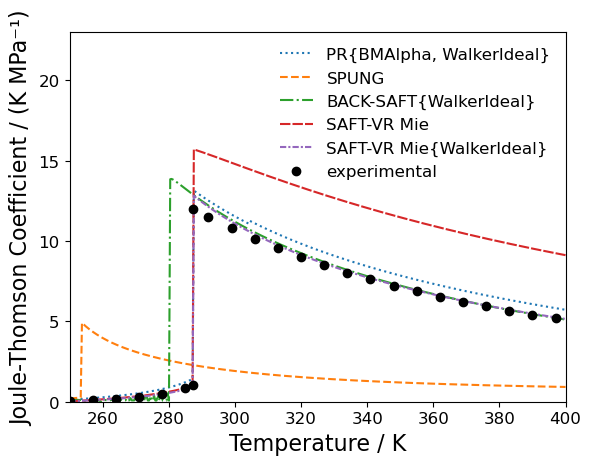

In [17]:
plt.clf()
plt.plot(T,μJT[1],label="PR{BMAlpha, WalkerIdeal}",linestyle=":")
plt.plot(T,μJT[2],label="SPUNG",linestyle="--")
plt.plot(T,μJT[3],label="BACK-SAFT{WalkerIdeal}",linestyle="-.")
plt.plot(T,μJT[4],label="SAFT-VR Mie",linestyle=(0, (5, 1)))
plt.plot(T,μJT[5],label="SAFT-VR Mie{WalkerIdeal}",linestyle=(0, (3, 1, 1, 1)))
plt.plot(T_μJTexp,μJT_exp,label="experimental","o",color = "k")

plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Joule-Thomson Coefficient / (K MPa⁻¹)",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([250,400])
plt.ylim([0,23])
display(plt.gcf())

As we can see, the lack of an ideal term can again have a great impact on our predictions of the Joule-Thomson coefficient. We can also see in the above, the SPUNG method, based on the principle of corresponding states, performs badly when the species in question differs greatly from the reference (propane by default).